In [107]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [108]:
#Read csv file and convert into Dataframe
data=pd.read_excel(r'D:\DataTrained\Flip Robo Technology Internship\Car Price Prediction\Car Price Prediction Exracted Data.xlsx')
data

,Brand,Model,Variant,Manufacturing Year,Driven km,Fuel,No of owners,Location,Kind,Price
0,Maruti Suzuki,Alto K10,VXI,2017.0,33606,PETROL,1,Delhi,MANUAL,"3,49,999"
1,Maruti Suzuki,S Cross,2015-2017 DDiS 320 Zeta,2017.0,79000.0,DIESEL,1,Nashik,MANUAL,"8,75,000"
2,Maruti Suzuki,Baleno,Zeta,2020.0,26085.0,PETROL,1,Pune,MANUAL,"7,85,000"
3,Maruti Suzuki,Alto K10,VXI,2016.0,58000.0,CNG & HYBRIDS,1,Delhi,MANUAL,"3,15,000"
4,Maruti Suzuki,Wagon R 1.0,1.0 LXi,2016.0,52500.0,PETROL,2,Delhi,MANUAL,"3,60,000"
...,...,...,...,...,...,...,...,...,...,...
6659,Toyota,Innova,2.5 G (Diesel) 8 Seater BS IV,2015.0,"66,000",Diesel,NaN,Lucknow,Manual,825000
6660,Hyundai,Verna,Xi (Petrol),2006.0,"1,10,000",Petrol,NaN,Lucknow,Manual,150000
6661,Hyundai,Verna,1.6 SX,2012.0,"1,02,133",Diesel,NaN,Lucknow,Manual,328000
6662,Mahindra,Quanto,C2,2014.0,"1,20,000",Diesel,NaN,Lucknow,Manual,250000


In [109]:
#shape of file
data.shape

(6664, 10)

In [112]:
#Lets see the columns present in the dataset
data.columns

Index(['Brand', 'Model', 'Variant', 'Manufacturing Year', 'Driven km', 'Fuel',
       'No of owners', 'Location', 'Kind', 'Price'],
      dtype='object')

In [110]:
# Checking for data types of the columns
data.dtypes

Brand                  object
Model                  object
Variant                object
Manufacturing Year    float64
Driven km              object
Fuel                   object
No of owners           object
Location               object
Kind                   object
Price                  object
dtype: object

In [111]:
# Checking for data types of the columns
data.isnull().sum()

Brand                    0
Model                    0
Variant                179
Manufacturing Year       0
Driven km                0
Fuel                     0
No of owners          5240
Location                 0
Kind                     0
Price                    0
dtype: int64

In [113]:
# Checking for null values in object datatype columns

for column in data:
    data[column]=data[column].replace(" ",np.nan)
    data[column]=data[column].replace("-- ",np.nan)
    data[column]=data[column].replace("--",np.nan)

In [114]:
# Checking for null values
data.isnull().sum()

Brand                    0
Model                    0
Variant                179
Manufacturing Year       0
Driven km               22
Fuel                    32
No of owners          5298
Location                 0
Kind                    92
Price                    0
dtype: int64

In [115]:
#As no of owners has majorly null values, it is safe to drop it
data=data.drop(columns=["No of owners"])

# Visualization of the Data, Encoding object data and filling the null values

Maruti Suzuki     1325
Hyundai           1085
Honda              609
Mahindra           352
Toyota             329
Renault            247
Tata               218
Mercedes-Benz      217
Ford               204
Volkswagen         194
BMW                182
Audi               161
Skoda              135
Jeep               109
Kia                106
MG                 105
Nissan              95
Ssangyong           78
Jaguar              76
Land Rover          74
Datsun              73
Chevrolet           72
Volvo               69
Fiat                50
Mitsubishi          50
Isuzu               45
Opel                40
Premier             40
Ashok Leyland       40
Bentley             40
Eicher Polaris      40
Bajaj               39
Ambassador          39
Force Motors        39
Rolls-Royce         31
Porsche             21
Lamborghini         19
Mini                13
Citroen              1
Lexus                1
Force                1
Name: Brand, dtype: int64


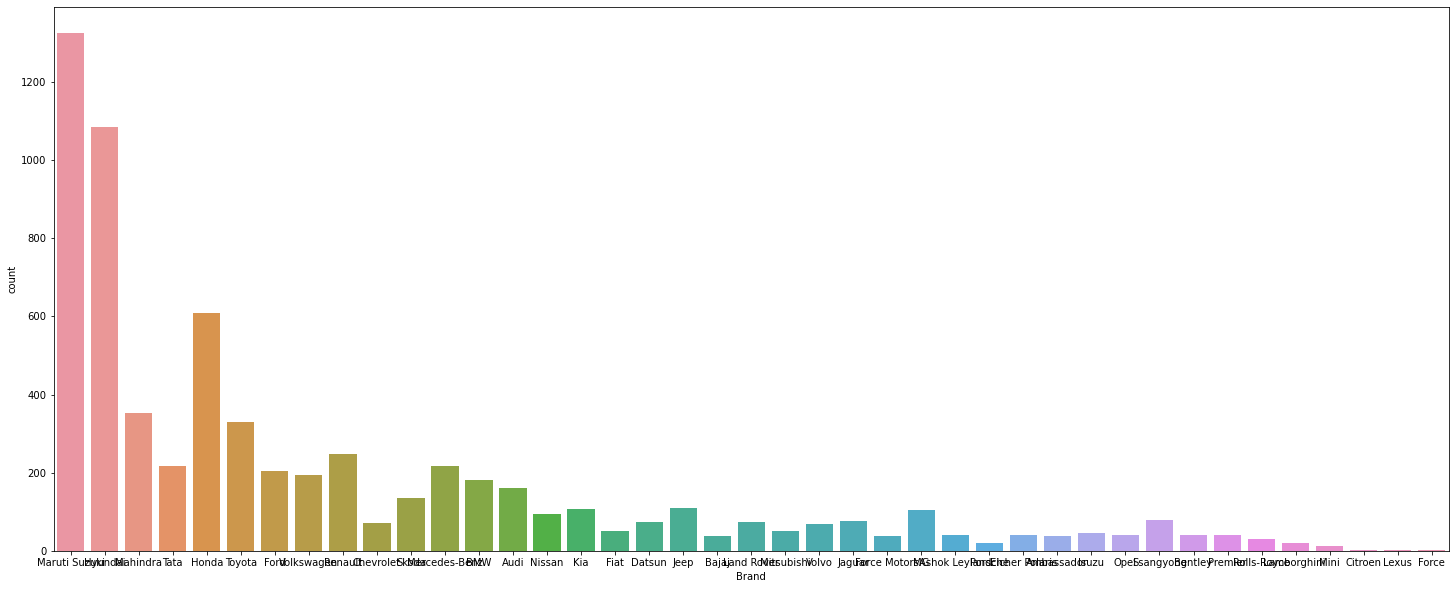

In [116]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Brand", data=data)
print(data["Brand"].value_counts())

In [117]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Brand"])
data["Brand"]=df

City            280
i20             207
Swift           184
Creta           184
Grand i10       167
               ... 
X6 M              1
A3 Cabriolet      1
A8l               1
A8 L              1
One               1
Name: Model, Length: 391, dtype: int64


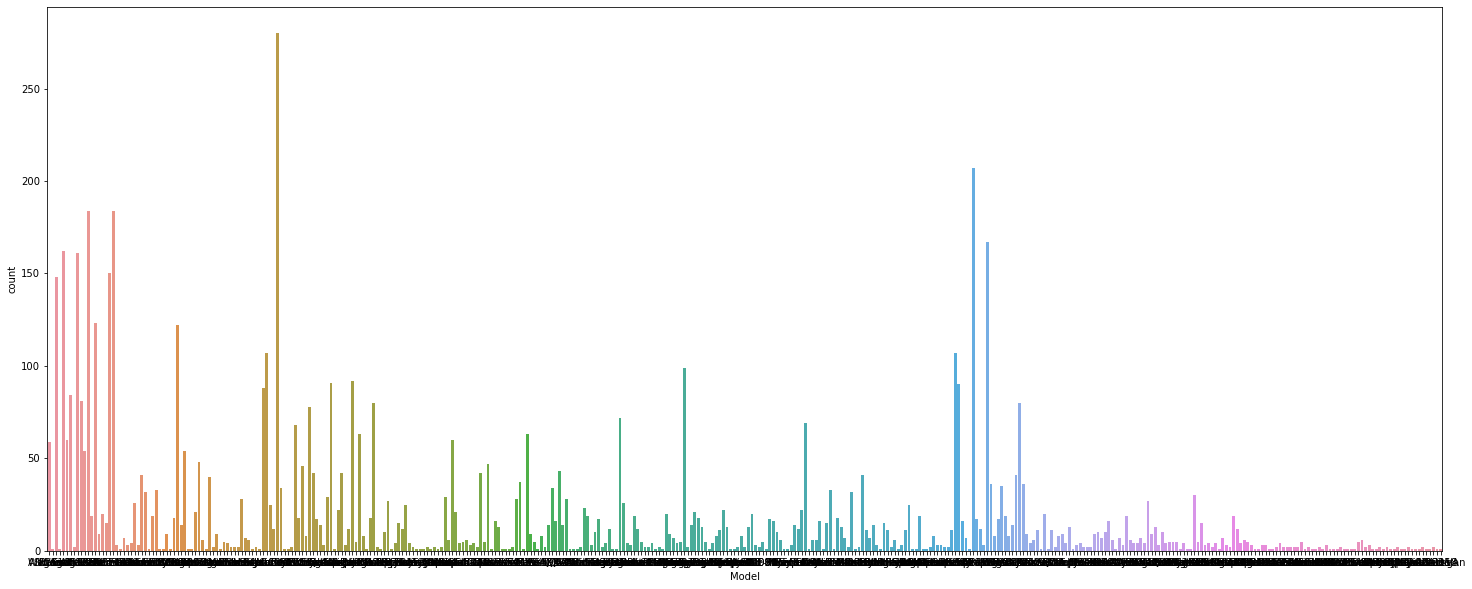

In [118]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Model", data=data)
print(data["Model"].value_counts())

In [119]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Model"])
data["Model"]=df

VXI                      162
Others                    94
LXI                       75
Sportz                    66
VDI                       61
                        ... 
Shine CVT                  1
mHAWK D70 ZLX              1
C 200 CGI                  1
GTX Plus Turbo DCT DT      1
Xi (Petrol)                1
Name: Variant, Length: 1988, dtype: int64


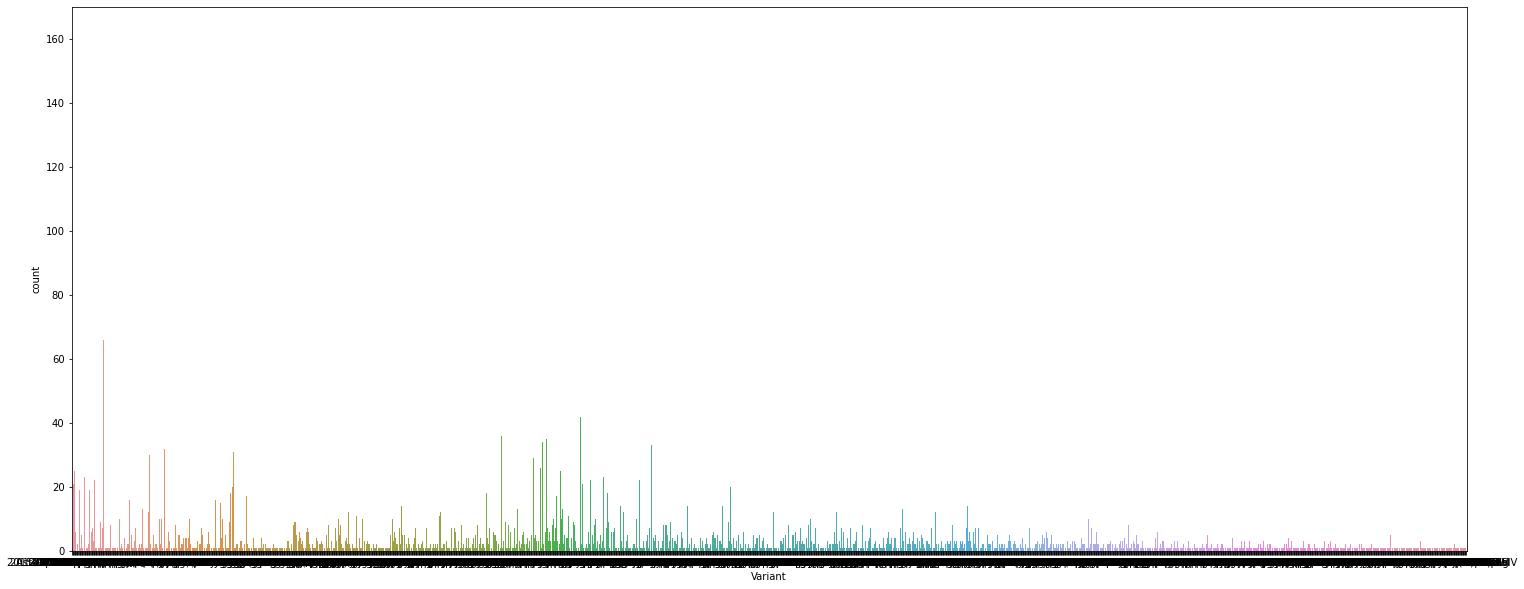

In [120]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Variant", data=data)
print(data["Variant"].value_counts())

In [121]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Variant"])
data["Variant"]=df

In [122]:
print(data["Variant"].value_counts())

1988    179
1714    162
1365     94
1288     75
1572     66
       ... 
1549      1
1962      1
939       1
1188      1
1868      1
Name: Variant, Length: 1989, dtype: int64


In [123]:
#Replacing wrongly encoded null value with null value
data["Variant"]=data["Variant"].replace(1988,np.nan)

In [124]:
print(data["Variant"].value_counts())

1714.0    162
1365.0     94
1288.0     75
1572.0     66
1670.0     61
         ... 
1549.0      1
1962.0      1
939.0       1
1188.0      1
1868.0      1
Name: Variant, Length: 1988, dtype: int64


In [125]:
#Converting manufacturing year to int data type
data["Manufacturing Year"]=data["Manufacturing Year"].astype(int)

2017    829
2018    816
2016    707
2015    636
2019    598
2014    540
2013    413
2020    404
2021    359
2012    328
2011    259
2010    192
2009    115
2022    115
2008     89
2007     77
2006     45
2005     35
2004     29
2003     18
2002      9
2001      8
2000      6
1995      6
1990      5
1998      4
1991      4
1997      3
1999      3
1993      2
1994      2
1957      1
1982      1
1980      1
1968      1
1963      1
1974      1
1996      1
1985      1
Name: Manufacturing Year, dtype: int64


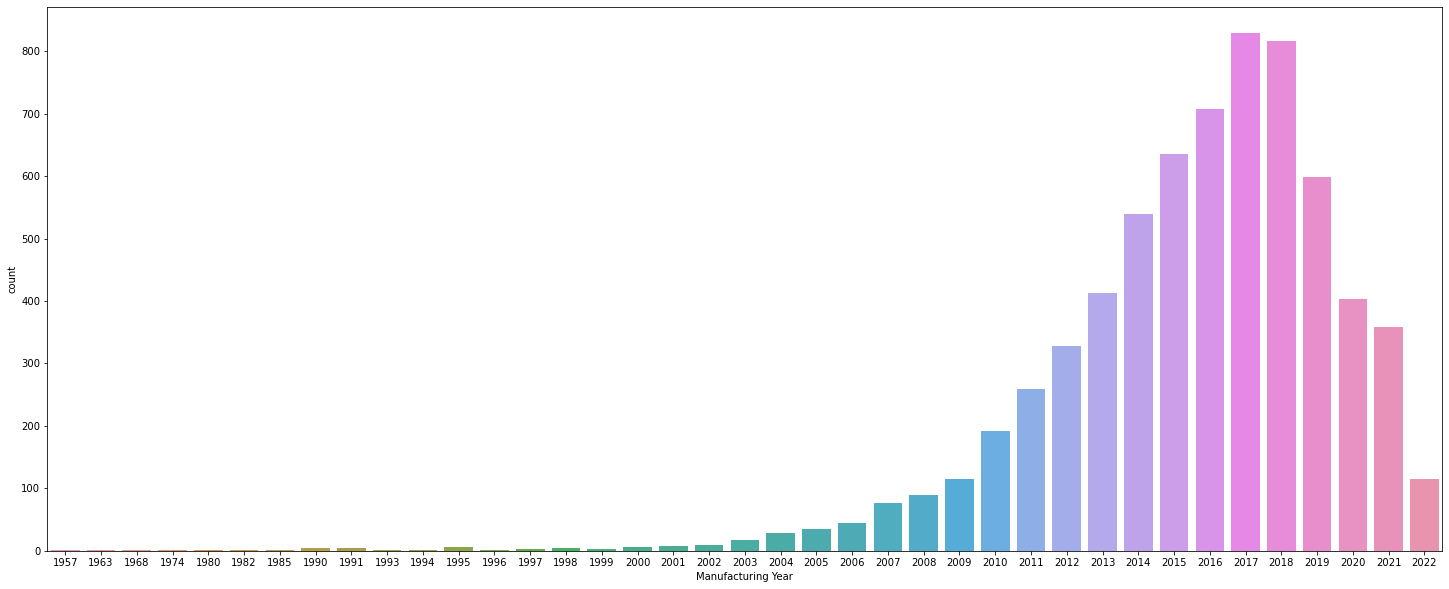

In [126]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Manufacturing Year", data=data)
print(data["Manufacturing Year"].value_counts())

In [127]:
#Converting Driven km to float data type
dkm=list(data["Driven km"])

In [128]:
dkm

['33606 ',
 '79000.0 ',
 '26085.0 ',
 '58000.0 ',
 '52500.0 ',
 '54000.0 ',
 '78323.0 ',
 '75232.0 ',
 '14000.0 ',
 '14,000 ',
 '55000.0 ',
 '70000 ',
 '200000 ',
 '96,000 ',
 '61369.0 ',
 '104,411 ',
 '9000.0 ',
 '79000.0 ',
 '59000.0 ',
 '70,000 ',
 '81000.0 ',
 '146,000 ',
 '13000.0 ',
 '23,000 ',
 '76,000 ',
 '70,000 ',
 '30000 ',
 '86,000 ',
 '70000 ',
 '85000.0 ',
 '115,000 ',
 '79,000 ',
 '150,000 ',
 '63559.0 ',
 '52000.0 ',
 '79843 ',
 '73295.0 ',
 '114000.0 ',
 '160,000 ',
 '44000.0 ',
 '32154 ',
 '47250.0 ',
 '52000.0 ',
 '49000.0 ',
 '25000.0 ',
 '120000 ',
 '92000.0 ',
 '115,000 ',
 '57000.0 ',
 '105,000 ',
 '59,000 ',
 '76000.0 ',
 '33255.0 ',
 '123,240 ',
 '45,000 ',
 '66300.0 ',
 '42,000 ',
 '120000.0 ',
 '131000.0 ',
 '85000.0 ',
 '95000.0 ',
 '55000.0 ',
 '82,000 ',
 '47000.0 ',
 '77000.0 ',
 '98,000 ',
 '20 ',
 '30,000 ',
 '75,000 ',
 '62000.0 ',
 '14000.0 ',
 '32000.0 ',
 '58000.0 ',
 '16,220 ',
 '27000.0 ',
 '20000.0 ',
 '38000.0 ',
 '54000.0 ',
 '97,500 ',
 '15000

In [129]:
l=len(dkm)
for j in range(0,l):
    if type(dkm[j]) is not float:
        dkm[j]=dkm[j].replace(' ','')
        dkm[j]=dkm[j].replace(',','')

In [130]:
data["Driven km"]=dkm

In [131]:
data["Driven km"]=data["Driven km"].astype(float)

70000.0     92
50000.0     90
40000.0     84
60000.0     80
80000.0     72
            ..
115185.0     1
7179.0       1
76410.0      1
11839.0      1
102133.0     1
Name: Driven km, Length: 3065, dtype: int64


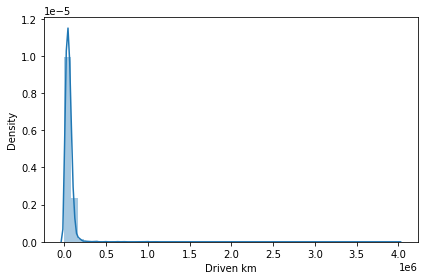

In [132]:
sns.distplot(data["Driven km"])
plt.xlabel("Driven km",fontsize=10)
plt.tight_layout()
print(data["Driven km"].value_counts())

Petrol           3110
Diesel           2047
DIESEL            811
PETROL            516
CNG                63
CNG & HYBRIDS      50
LPG                19
Electric           11
ELECTRIC            5
Name: Fuel, dtype: int64


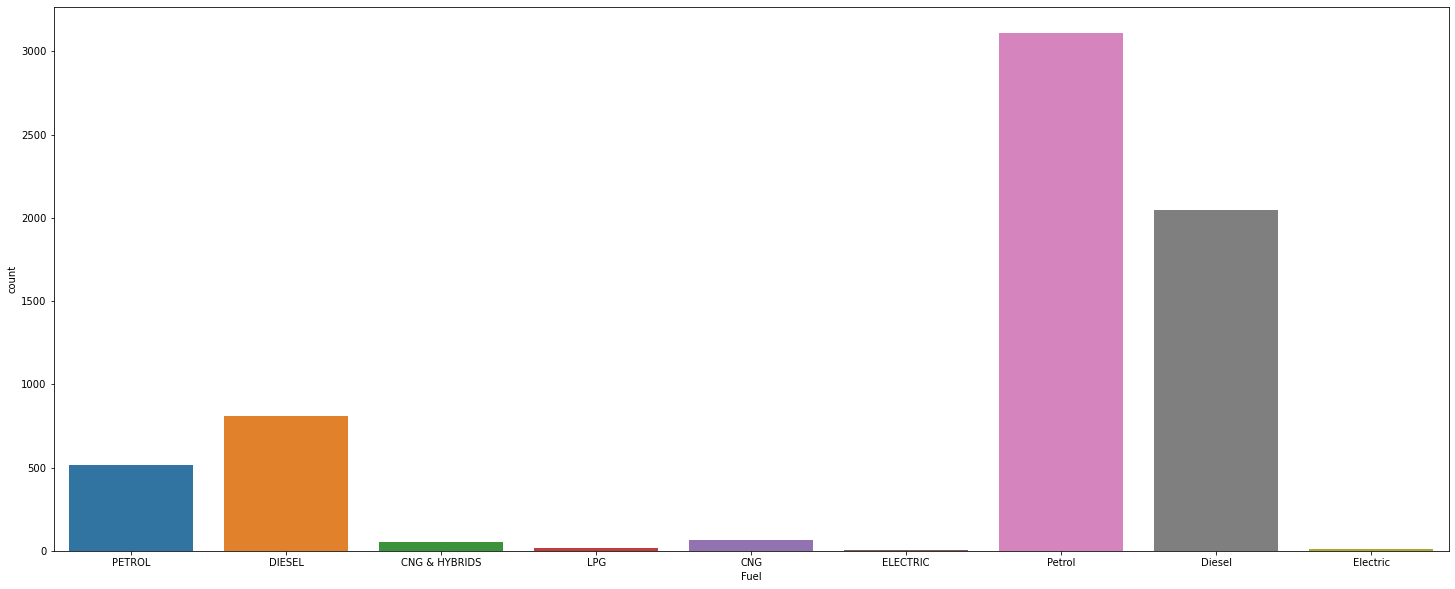

In [133]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Fuel", data=data)
print(data["Fuel"].value_counts())

In [134]:
data["Fuel"]=data["Fuel"].replace("PETROL","Petrol")
data["Fuel"]=data["Fuel"].replace("DIESEL","Diesel")
data["Fuel"]=data["Fuel"].replace("ELECTRIC","Electric")

Petrol           3626
Diesel           2858
CNG                63
CNG & HYBRIDS      50
LPG                19
Electric           16
Name: Fuel, dtype: int64


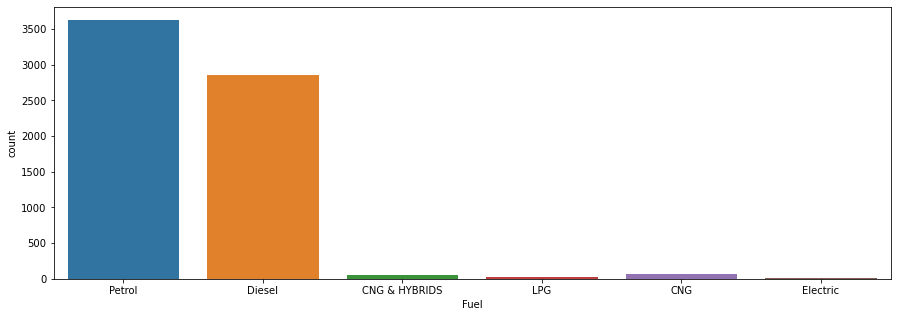

In [135]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="Fuel", data=data)
print(data["Fuel"].value_counts())

In [136]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Fuel"])
data["Fuel"]=df

In [137]:
print(data["Fuel"].value_counts())

5    3626
2    2858
0      63
1      50
6      32
4      19
3      16
Name: Fuel, dtype: int64


In [138]:
#Replacing wrongly encoded null value with null value
data["Fuel"]=data["Fuel"].replace(6,np.nan)

In [139]:
print(data["Fuel"].value_counts())

5.0    3626
2.0    2858
0.0      63
1.0      50
4.0      19
3.0      16
Name: Fuel, dtype: int64


Delhi        1480
Bengaluru     962
Hyderabad     860
Mumbai        763
Chennai       650
             ... 
Kithaur         1
Shillong        1
Eranellur       1
Uthukuli        1
Payyannur       1
Name: Location, Length: 331, dtype: int64


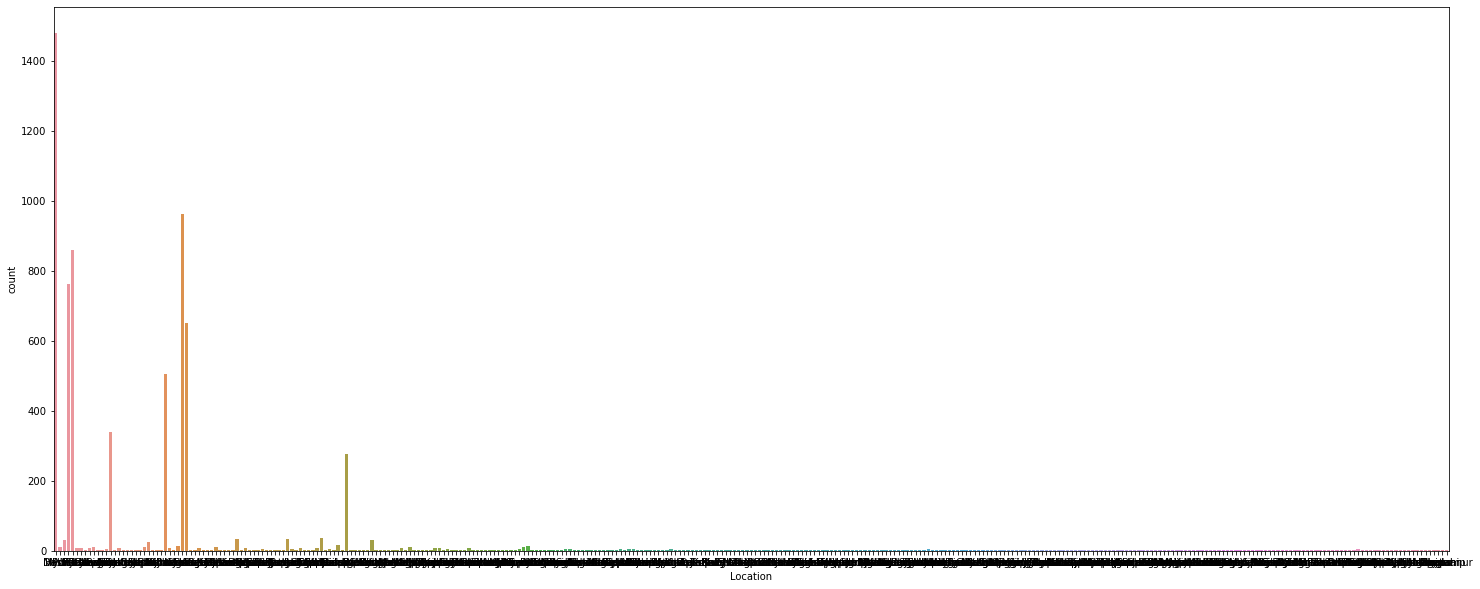

In [140]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Location", data=data)
print(data["Location"].value_counts())

In [141]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Location"])
data["Location"]=df

Manual       3698
Automatic    1542
MANUAL        795
AUTOMATIC     537
Name: Kind, dtype: int64


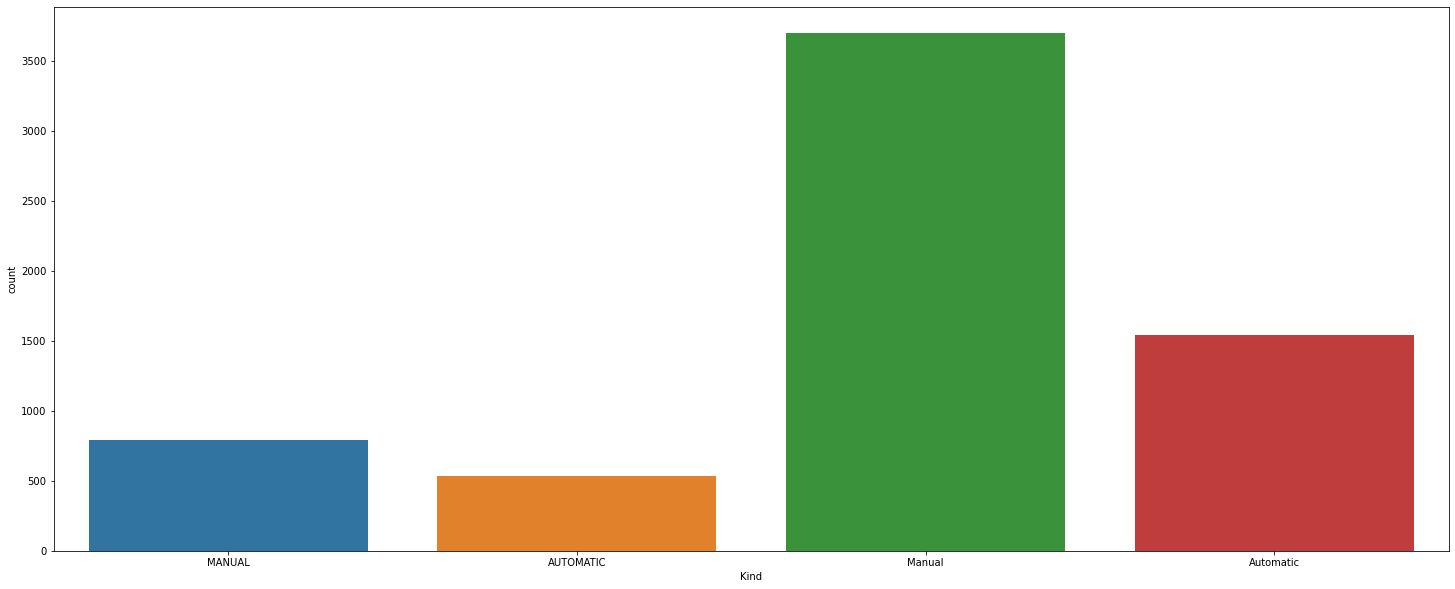

In [142]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Kind", data=data)
print(data["Kind"].value_counts())

In [143]:
data["Kind"]=data["Kind"].replace("MANUAL","Manual")
data["Kind"]=data["Kind"].replace("AUTOMATIC","Automatic")

Manual       4493
Automatic    2079
Name: Kind, dtype: int64


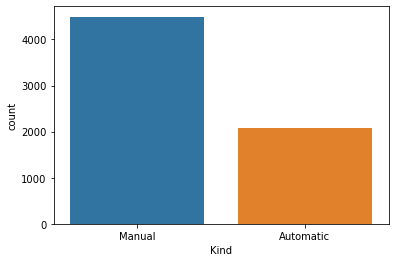

In [145]:
ax=sns.countplot(x="Kind", data=data)
print(data["Kind"].value_counts())

In [146]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Kind"])
data["Kind"]=df

In [147]:
print(data["Kind"].value_counts())

1    4493
0    2079
2      92
Name: Kind, dtype: int64


In [148]:
#Replacing wrongly encoded null value with null value
data["Kind"]=data["Kind"].replace(2,np.nan)

In [149]:
print(data["Kind"].value_counts())

1.0    4493
0.0    2079
Name: Kind, dtype: int64


In [150]:
#Converting Price to float data type
dpr=list(data["Price"])

In [151]:
dpr

['3,49,999',
 '8,75,000',
 '7,85,000',
 '3,15,000',
 '3,60,000',
 '3,95,000',
 '6,65,000',
 '9,20,000',
 '11,25,000',
 '4,49,000',
 '1,35,000',
 '2,60,000',
 '4,25,000',
 '2,95,000',
 '2,40,000',
 '90,000',
 '3,10,000',
 '4,60,000',
 '4,25,000',
 '2,01,500',
 '3,10,000',
 '2,20,000',
 '11,20,000',
 '7,05,000',
 '1,10,000',
 '7,50,000',
 '4,70,000',
 '4,60,000',
 '5,25,000',
 '7,15,000',
 '1,10,000',
 '1,00,000',
 '2,50,000',
 '1,37,000',
 '4,50,000',
 '2,18,211',
 '1,85,000',
 '2,40,000',
 '1,40,000',
 '9,50,000',
 '11,30,776',
 '3,35,000',
 '5,35,000',
 '14,90,000',
 '2,50,000',
 '1,95,000',
 '4,15,000',
 '1,15,000',
 '13,75,000',
 '1,60,000',
 '1,45,000',
 '3,95,000',
 '10,50,000',
 '70,120',
 '3,00,000',
 '2,97,000',
 '2,10,000',
 '3,25,000',
 '3,00,000',
 '2,75,000',
 '3,25,000',
 '4,80,000',
 '1,99,000',
 '4,95,000',
 '6,15,000',
 '2,65,000',
 '1,10,000',
 '6,50,000',
 '3,65,000',
 '4,50,000',
 '12,50,000',
 '5,25,000',
 '2,10,000',
 '12,50,000',
 '7,80,000',
 '8,91,000',
 '5,45,0

In [155]:
l=len(dpr)
for j in range(0,l):
    if type(dpr[j]) is str:
        dpr[j]=dpr[j].replace(' ','')
        dpr[j]=dpr[j].replace(',','')

In [156]:
data["Price"]=dpr

In [157]:
data["Price"]=data["Price"].astype(float)

425000.0     60
525000.0     58
450000.0     55
575000.0     51
550000.0     49
             ..
978000.0      1
1499990.0     1
286000.0      1
258000.0      1
361000.0      1
Name: Price, Length: 1397, dtype: int64


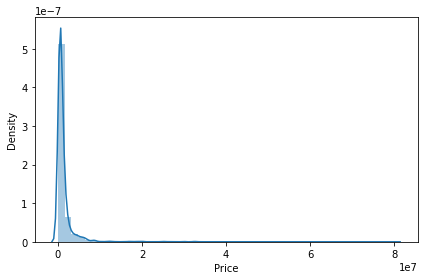

In [158]:
sns.distplot(data["Price"])
plt.xlabel("Price",fontsize=10)
plt.tight_layout()
print(data["Price"].value_counts())

In [159]:
data.dtypes

Brand                   int32
Model                   int32
Variant               float64
Manufacturing Year      int32
Driven km             float64
Fuel                  float64
Location                int32
Kind                  float64
Price                 float64
dtype: object

In [160]:
data.isnull().sum()

Brand                   0
Model                   0
Variant               179
Manufacturing Year      0
Driven km              22
Fuel                   32
Location                0
Kind                   92
Price                   0
dtype: int64

In [161]:
data.columns

Index(['Brand', 'Model', 'Variant', 'Manufacturing Year', 'Driven km', 'Fuel',
       'Location', 'Kind', 'Price'],
      dtype='object')

In [163]:
#Imputing null values using KNN Imputer to replace Null with meaningful data

from sklearn.impute import KNNImputer
knnimp=KNNImputer(n_neighbors=3)
df=pd.DataFrame(knnimp.fit_transform(data[['Brand', 'Model', 'Variant', 'Manufacturing Year', 'Driven km', 'Fuel', 'Location', 'Kind', 'Price']]), columns=['Brand', 'Model', 'Variant', 'Manufacturing Year', 'Driven km', 'Fuel', 'Location', 'Kind', 'Price'])
data['Variant']=df['Variant']
data['Driven km']=df['Driven km']
data['Fuel']=df['Fuel']
data['Kind']=df['Kind']

In [164]:
data.isnull().sum()

Brand                 0
Model                 0
Variant               0
Manufacturing Year    0
Driven km             0
Fuel                  0
Location              0
Kind                  0
Price                 0
dtype: int64

In [165]:
#Statistical Analysis
data.describe()

,Brand,Model,Variant,Manufacturing Year,Driven km,Fuel,Location,Kind,Price
count,6664.000000,6664.000000,6664.000000,6664.000000,6.664000e+03,6664.000000,6664.000000,6664.000000,6.664000e+03
mean,21.596939,202.542467,1062.330832,2015.508403,5.658429e+04,3.622299,99.781363,0.682623,1.309864e+06
std,10.041273,116.630742,592.921475,4.229310,6.942200e+04,1.531199,68.560240,0.464989,2.768377e+06
min,0.000000,0.000000,0.000000,1957.000000,0.000000e+00,0.000000,0.000000,0.000000,1.330000e+00
25%,15.000000,97.000000,525.000000,2014.000000,2.900000e+04,2.000000,56.000000,0.000000,3.990000e+05
50%,24.000000,192.000000,1146.000000,2016.000000,5.000000e+04,5.000000,66.000000,1.000000,6.500000e+05
75%,26.000000,310.000000,1582.000000,2018.000000,7.323875e+04,5.000000,150.000000,1.000000,1.192250e+06
max,40.000000,390.000000,1987.000000,2022.000000,3.990000e+06,5.000000,330.000000,1.000000,8.000000e+07


# Checking Correlation

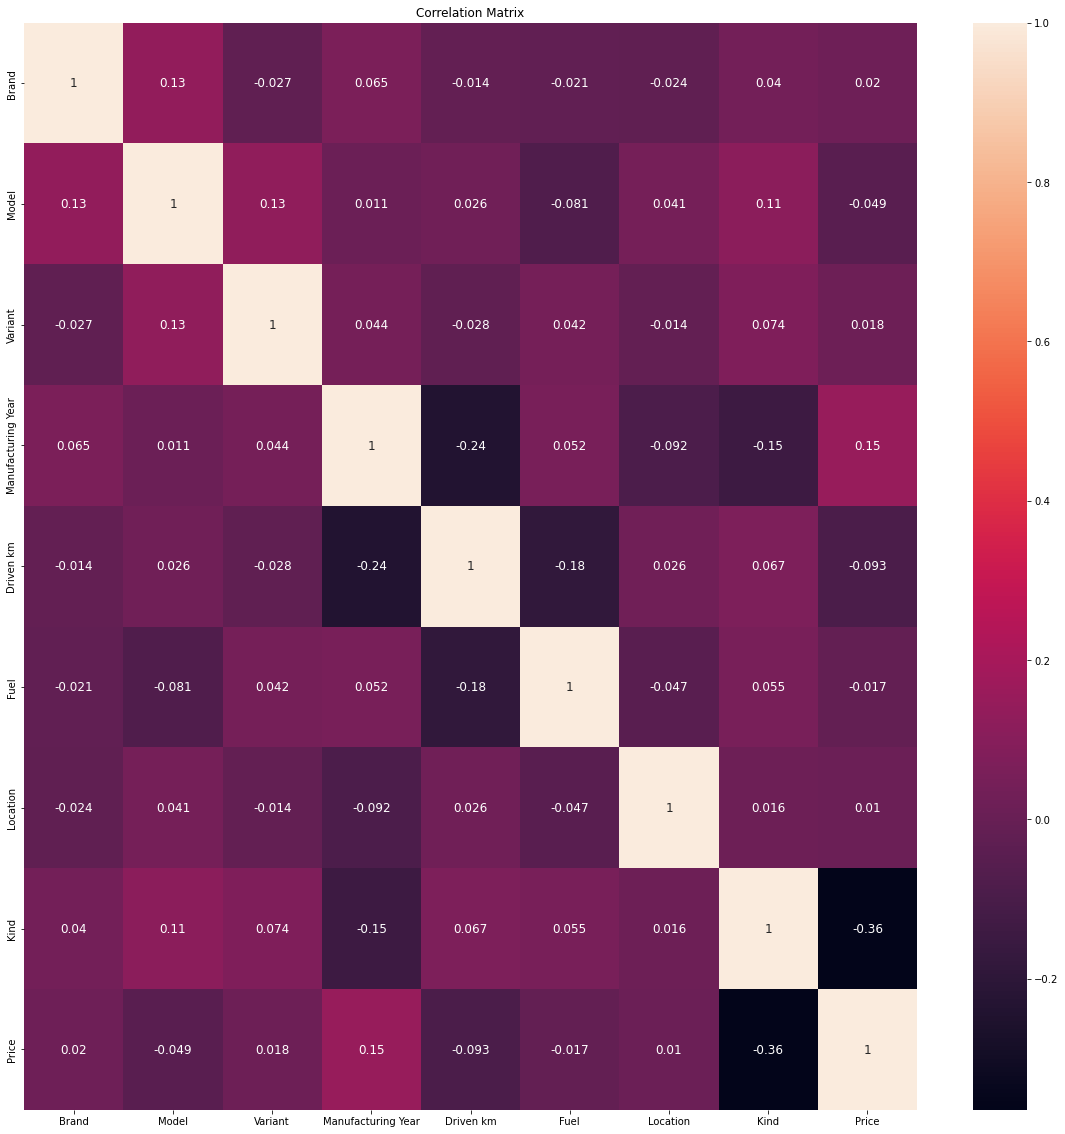

In [166]:
#Lets view the heatmap
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=[20,20])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True, annot_kws={'size':12})
plt.title("Correlation Matrix")
plt.show()

In [168]:
#Let's print the correlation coefficient for the Prediction with Price

corr_matrix=data.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                 1.000000
Manufacturing Year    0.147913
Brand                 0.019558
Variant               0.017863
Location              0.010105
Fuel                 -0.017235
Model                -0.049014
Driven km            -0.093212
Kind                 -0.364608
Name: Price, dtype: float64

# Checking for outliers

In [169]:
data.shape

(6664, 9)

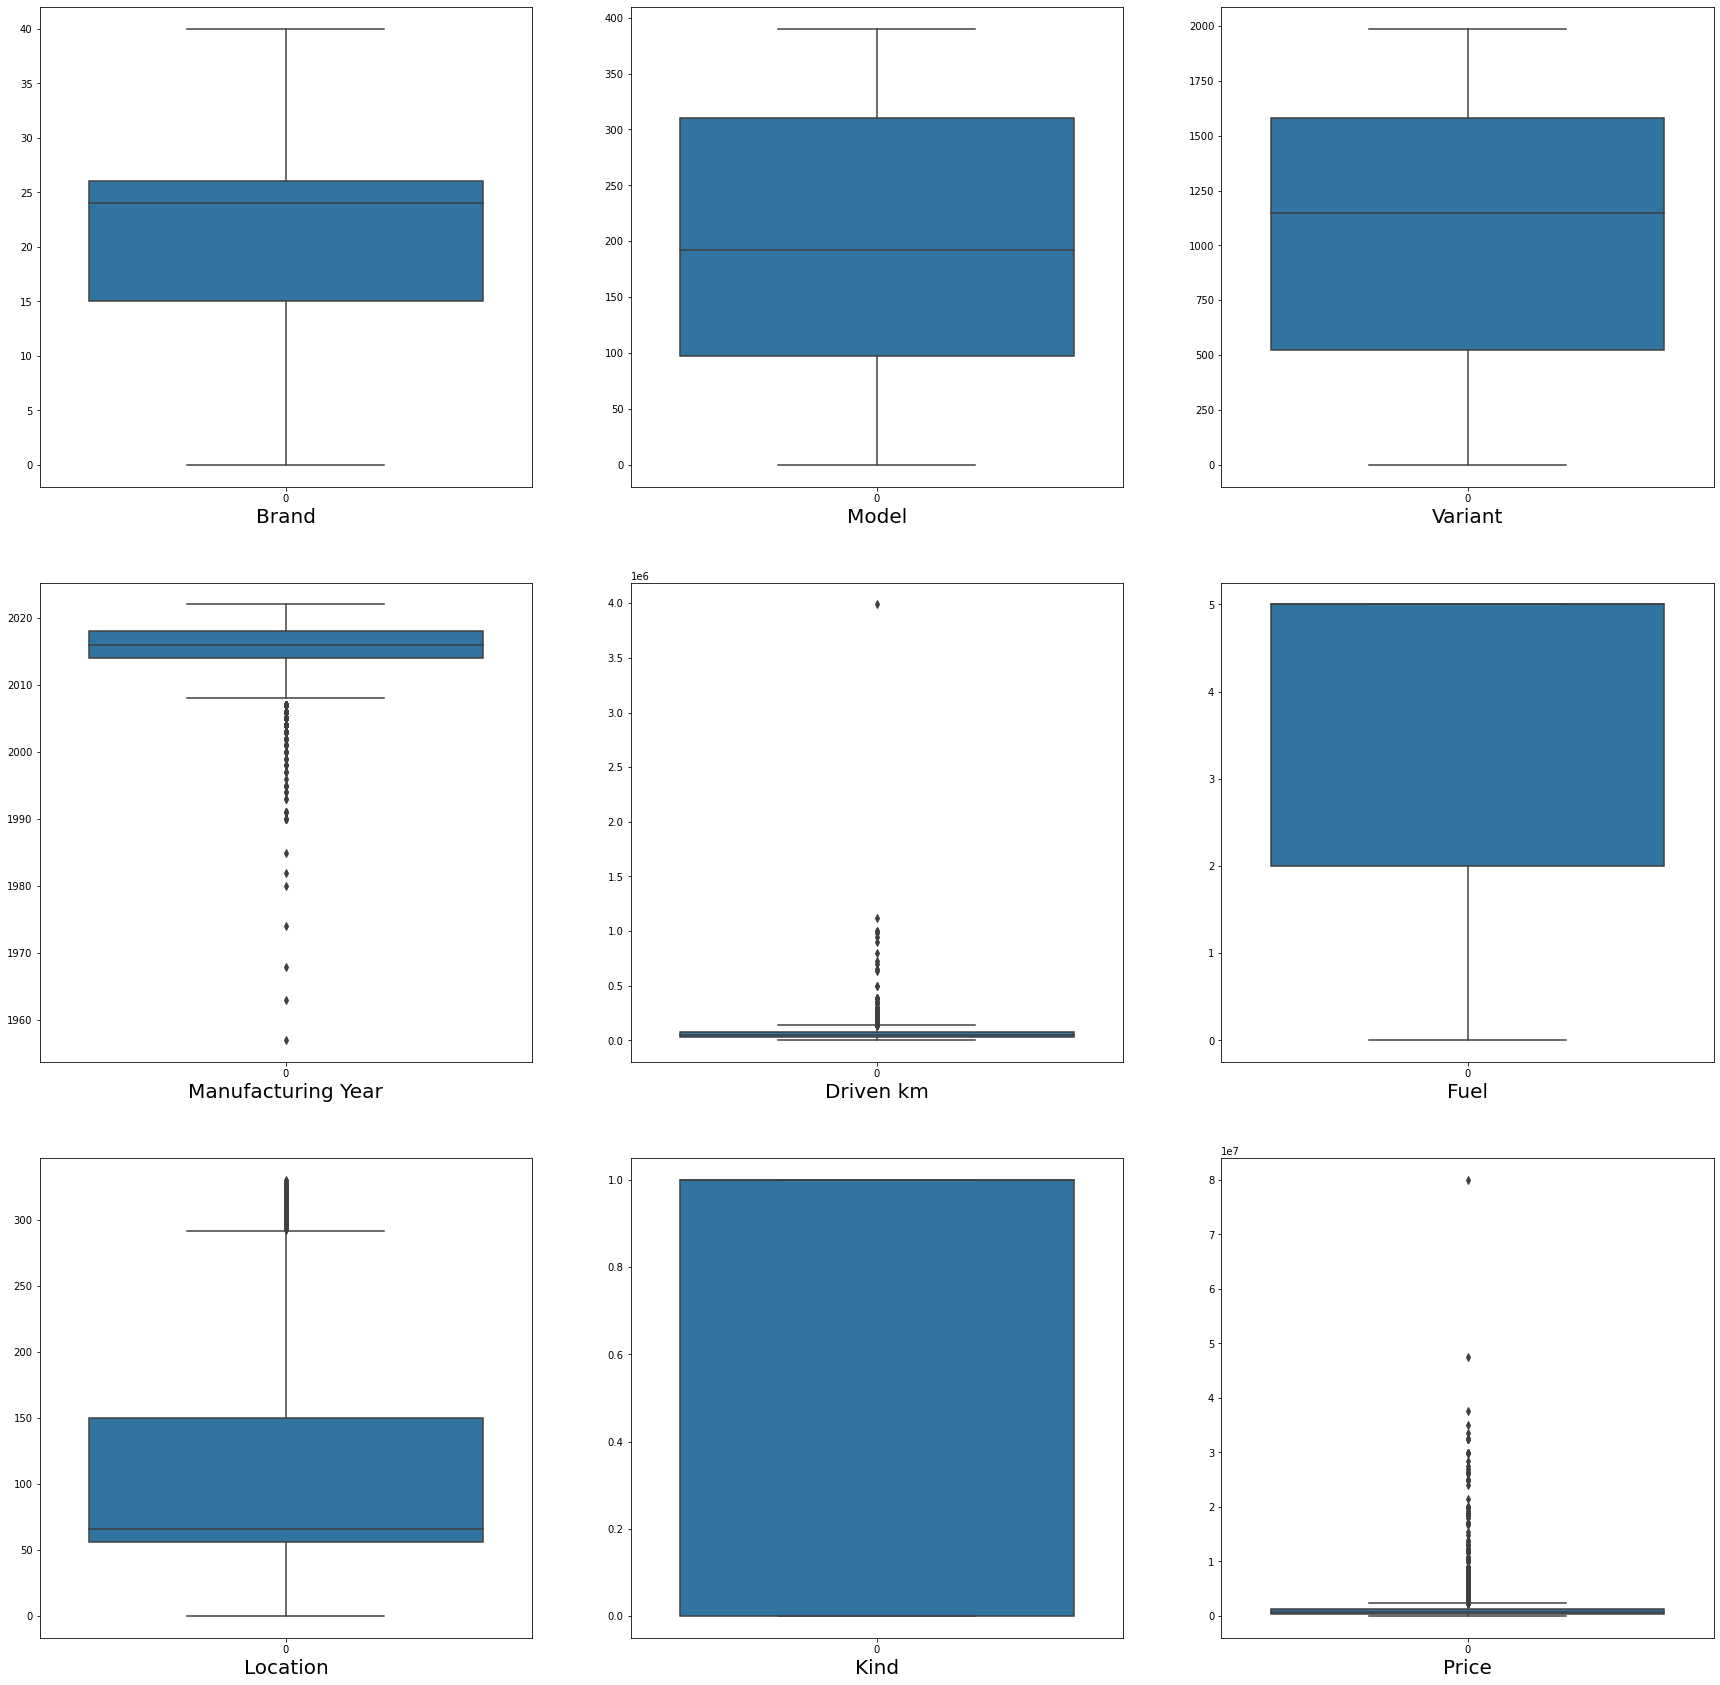

In [172]:
#visulaize the outliers using boxplot
plt.figure(figsize=(30,30))
graph=1

for column in data:
    if graph<=9:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(data=data[column], orient='v')
        plt.xlabel(column,fontsize=20)
    graph=graph+1
plt.show()

In [173]:
#remove outliers using zscore technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z.shape

(6664, 9)

In [174]:
threshold=3
print(np.where(z>3))

(array([  11,   55,   78,  110,  119,  230,  230,  230,  231,  238,  239,
        267,  322,  323,  362,  370,  402,  440,  441,  449,  456,  468,
        469,  470,  475,  488,  490,  564,  579,  627,  636,  653,  662,
        683,  685,  688,  727,  731,  755,  760,  761,  770,  774,  791,
        795,  808,  816,  827,  836,  841,  843,  843,  849,  851,  863,
        888,  912,  953,  969,  980,  980,  982, 1019, 1023, 1057, 1057,
       1061, 1067, 1085, 1087, 1096, 1103, 1104, 1109, 1112, 1112, 1113,
       1116, 1119, 1119, 1122, 1124, 1126, 1126, 1129, 1132, 1136, 1136,
       1137, 1160, 1165, 1165, 1186, 1187, 1190, 1193, 1199, 1204, 1208,
       1241, 1246, 1259, 1262, 1265, 1277, 1280, 1290, 1293, 1294, 1298,
       1299, 1302, 1307, 1313, 1316, 1318, 1326, 1333, 1335, 1337, 1338,
       1344, 1352, 1355, 1358, 1359, 1364, 1366, 1370, 1371, 1373, 1375,
       1376, 1377, 1379, 1380, 1381, 1382, 1383, 1385, 1386, 1387, 1388,
       1390, 1392, 1393, 1394, 1395, 1396, 1397, 1

In [175]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(6664, 9)
(6459, 9)


# 
As the data loss is 3%, outlier removal is considered

# Divide Data Set into features and labels

In [179]:
y=data_new['Price']
x=data_new.drop(columns=['Price'])

# Visualizing Relationship

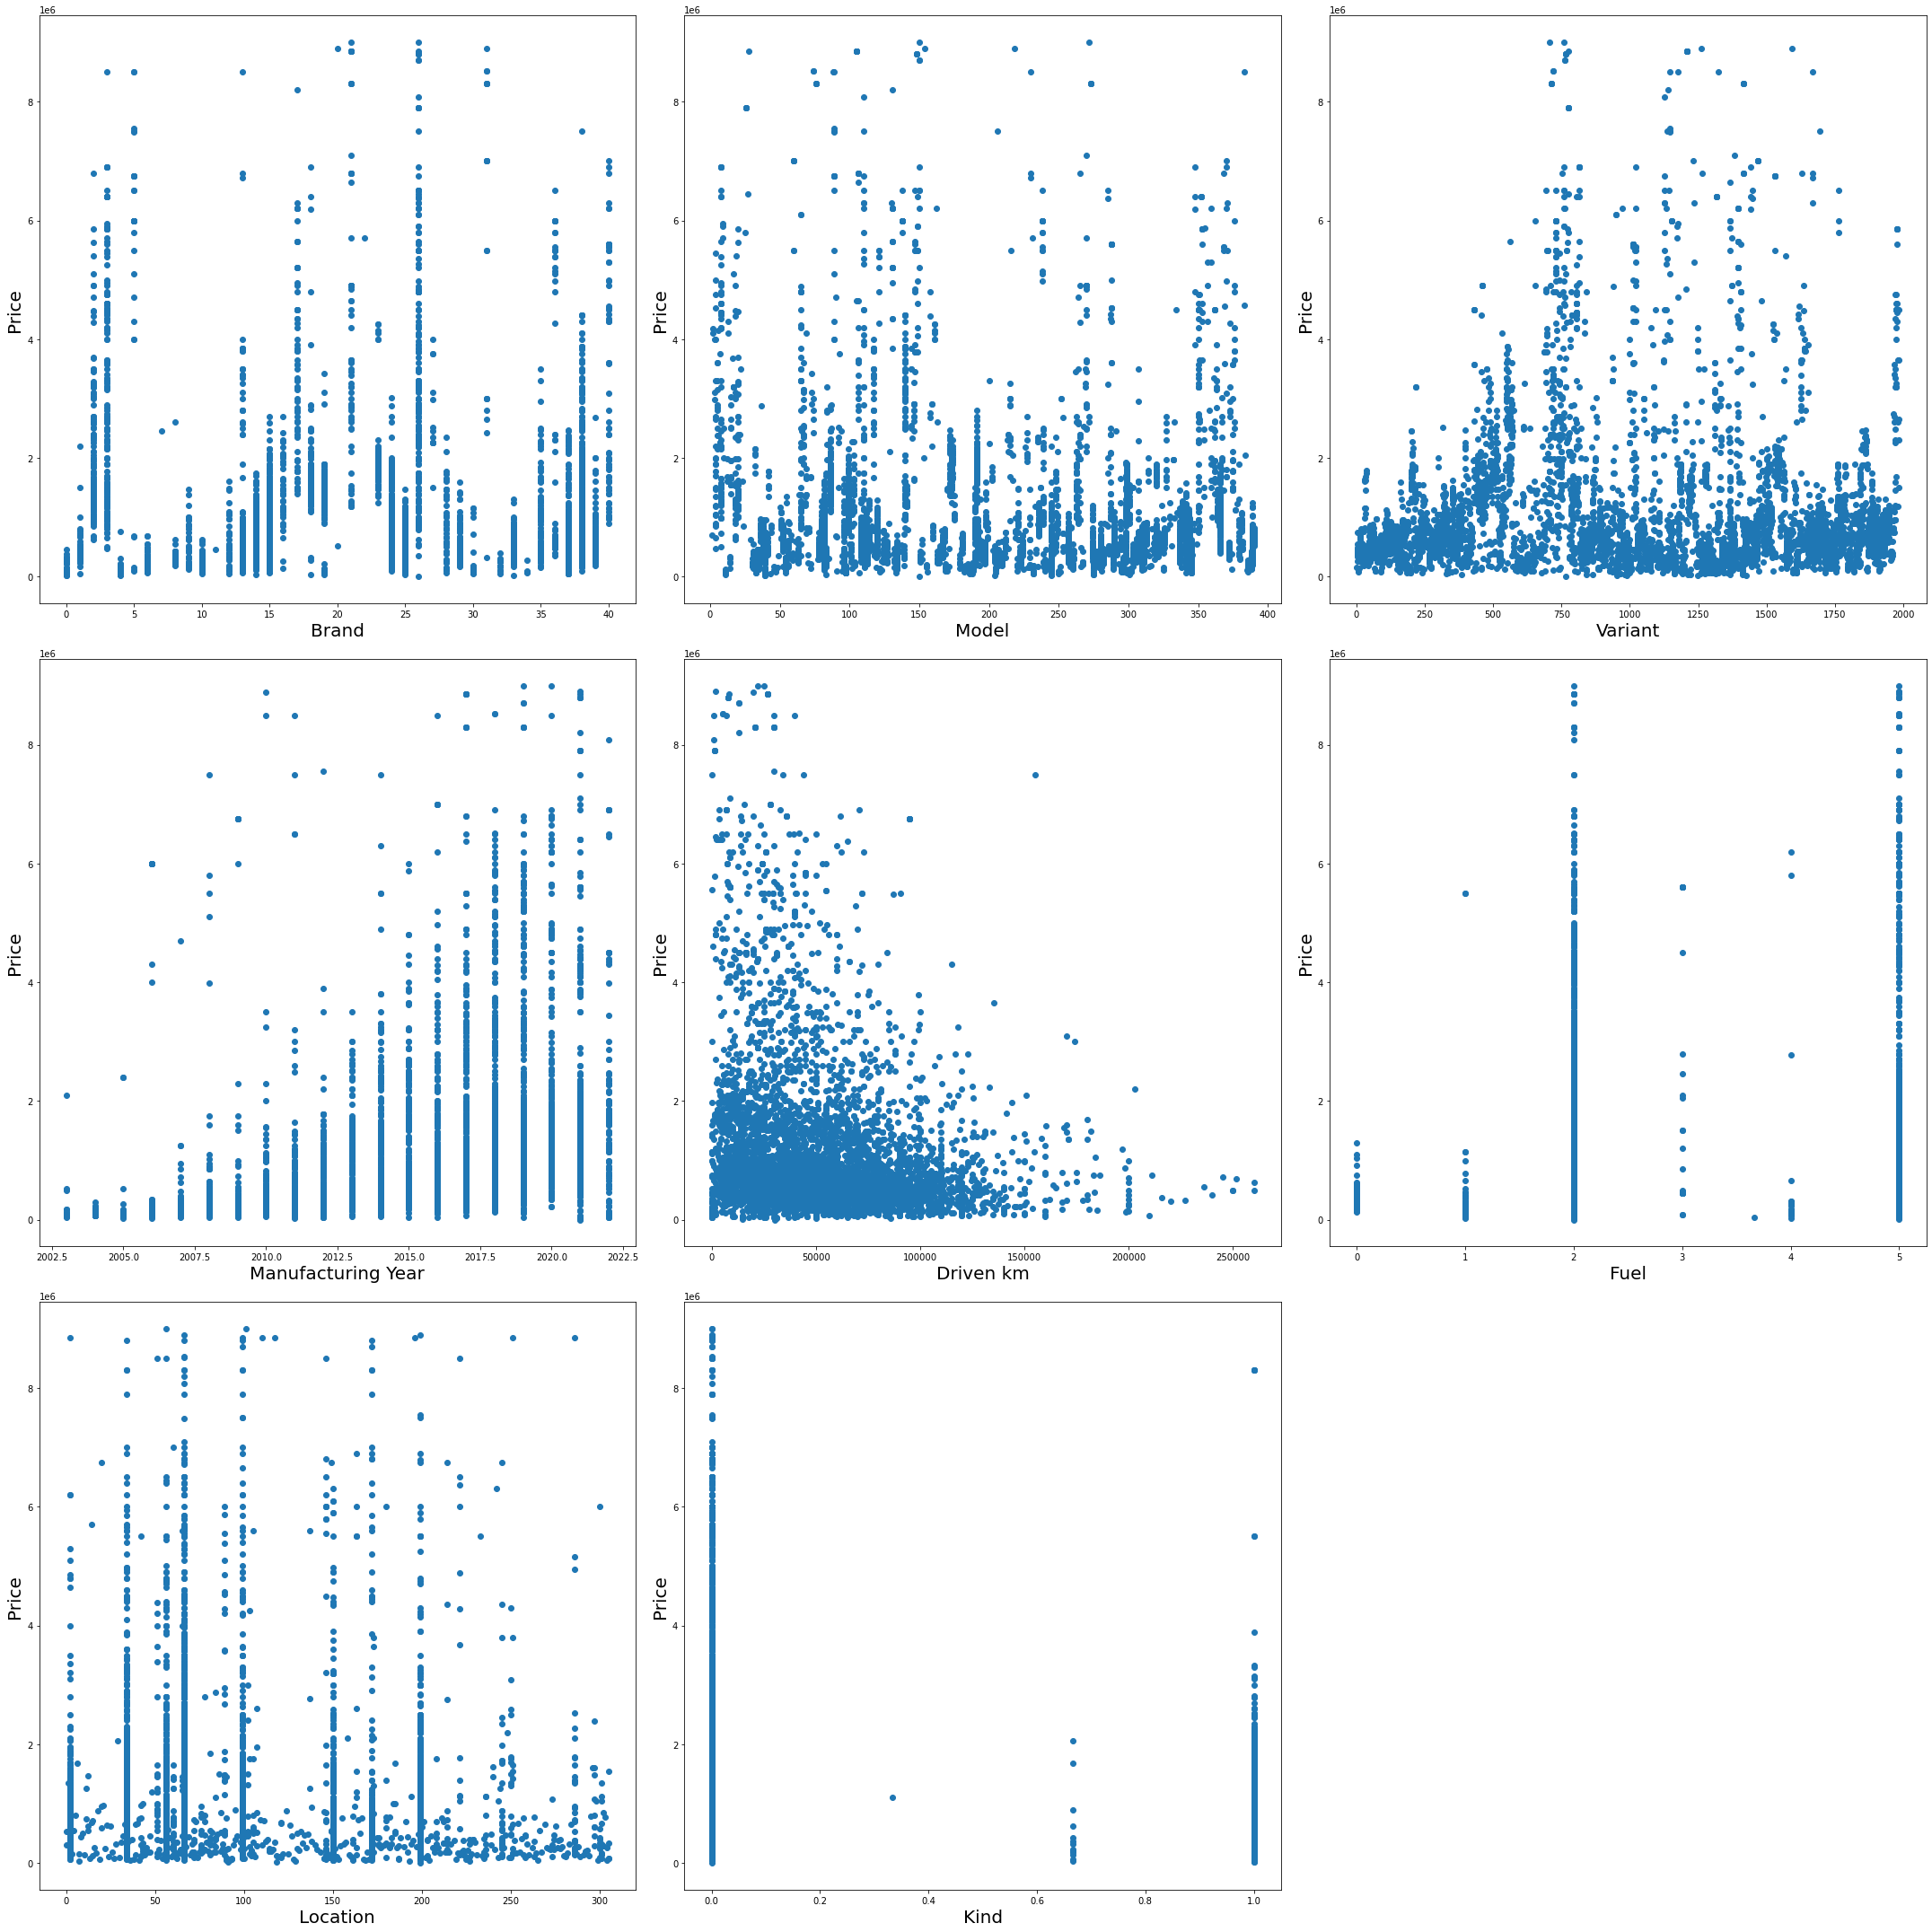

In [180]:
plt.figure(figsize=(30,30))
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price', fontsize=20)
    plotnumber=plotnumber+1
plt.tight_layout()

# Checking for skewness

In [181]:
x.skew().sort_values(ascending=False)

Driven km             1.082297
Location              0.801142
Model                 0.025468
Brand                 0.023501
Variant              -0.213326
Fuel                 -0.277616
Manufacturing Year   -0.760945
Kind                 -0.814154
dtype: float64

# Transforming Data to remove skewness

In [182]:
from sklearn.preprocessing import power_transform
x_n=power_transform(x)

In [183]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_n, columns=x.columns)
x_skew.skew().sort_values(ascending=False)

Driven km            -0.039447
Location             -0.040538
Brand                -0.119306
Model                -0.234896
Fuel                 -0.258771
Variant              -0.385557
Manufacturing Year   -0.532634
Kind                 -0.811216
dtype: float64

# Scaling the data

In [184]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_skew)

# Splitting data into train and test data

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr=LinearRegression()

#Finding Best random state
for i in range(0,100):
    features_train, features_test, target_train, target_test= train_test_split(X_scaled, y, test_size=0.2, random_state=i)
    lr.fit(features_train, target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print("At random state ",i, "the training accuracy is:- ",r2_score(target_train,pred_train))
    print("At random state ",i, "the testing accuracy is:- ",r2_score(target_test,pred_test))
    print("\n")

At random state  0 the training accuracy is:-  0.3764218438255774
At random state  0 the testing accuracy is:-  0.375341105711957


At random state  1 the training accuracy is:-  0.3851457806218864
At random state  1 the testing accuracy is:-  0.31907764348597045


At random state  2 the training accuracy is:-  0.3810307601548256
At random state  2 the testing accuracy is:-  0.35489184224724546


At random state  3 the training accuracy is:-  0.37636531855532795
At random state  3 the testing accuracy is:-  0.3746651431405372


At random state  4 the training accuracy is:-  0.37752938939189806
At random state  4 the testing accuracy is:-  0.3709509803972133


At random state  5 the training accuracy is:-  0.37206329384150993
At random state  5 the testing accuracy is:-  0.3930259287941431


At random state  6 the training accuracy is:-  0.3780335413863414
At random state  6 the testing accuracy is:-  0.36973403999899623


At random state  7 the training accuracy is:-  0.382375295702023

# Using Linear Regression Model

In [189]:
#Applying the best random state found(i.e. 62)

features_train, features_test, target_train, target_test= train_test_split(X_scaled, y, test_size=0.2, random_state=62)
lr.fit(features_train, target_train)
pred_test=lr.predict(features_test)
print(r2_score(target_test,pred_test))

0.3761345022280882


# Cross Validation of the model

In [190]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold ",j," the cv score is ", cv_mean," and accuracy score for the training is ",Train_accuracy," and the accuracy score for the testing is ",Test_accuracy)
    print("\n")

At cross fold  2  the cv score is  0.345433462679552  and accuracy score for the training is  -0.3463487855435423  and the accuracy score for the testing is  0.3761345022280882


At cross fold  3  the cv score is  0.34352882507361865  and accuracy score for the training is  -0.3463487855435423  and the accuracy score for the testing is  0.3761345022280882


At cross fold  4  the cv score is  0.35515320209310014  and accuracy score for the training is  -0.3463487855435423  and the accuracy score for the testing is  0.3761345022280882


At cross fold  5  the cv score is  0.3166661671224887  and accuracy score for the training is  -0.3463487855435423  and the accuracy score for the testing is  0.3761345022280882


At cross fold  6  the cv score is  0.35276293247279056  and accuracy score for the training is  -0.3463487855435423  and the accuracy score for the testing is  0.3761345022280882


At cross fold  7  the cv score is  0.3355167098795463  and accuracy score for the training is  -0.

# 
Since the number of folds don't have such impact on the accuracy and cv score. So cv=9 is selected

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score

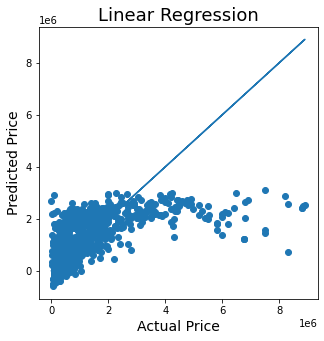

In [191]:
plt.figure(figsize=(5,5))
plt.scatter(x=target_test, y=pred_test)
plt.plot(target_test, target_test)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

# 
The best fit line passes through most of the points

# Regularization

In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001, .001, .01,.1, 1, 10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [193]:
ls=Lasso(alpha=10, random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train, target_train)
pred_ls=ls.predict(features_test)

lss=r2_score(target_test,pred_ls)
lss

0.3761342266507416

In [195]:
cv_score=cross_val_score(ls,X_scaled,y,cv=4)
cv_mean=cv_score.mean()
cv_mean

0.3551551832404276

# Using Random Forest Regressor Model

In [196]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'], 'max_features':["auto", "sqrt", "log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [205]:
rf=RandomForestRegressor(criterion="mse", max_features="log2")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print('R2 Score: ', rfs*100)

rfscore=cross_val_score(rf,X_scaled,y,cv=9)
rfc=rfscore.mean()
print("Cross Val Score:", rfc*100)

R2 Score:  84.72012627654479
Cross Val Score: 78.67143752239613


# Using Ada Boost Regressor Model

In [201]:
from sklearn.ensemble import AdaBoostRegressor
parameters={'n_estimators':np.arange(10,100), 'learning_rate':np.arange(0.01,0.1)}
ad=AdaBoostRegressor()
clf=GridSearchCV(ad,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'learning_rate': 0.01, 'n_estimators': 93}


In [202]:
ad=AdaBoostRegressor(n_estimators=93, learning_rate=0.01)
ad.fit(features_train, target_train)
ad.score(features_train, target_train)
pred_decision=ad.predict(features_test)

ads=r2_score(target_test,pred_decision)
print('R2 Score: ', ads*100)

adscore=cross_val_score(ad,X_scaled,y,cv=4)
adc=adscore.mean()
print("Cross Val Score:", adc*100)

R2 Score:  40.816799740815746
Cross Val Score: 37.82917081600889


# The R2 score of Random Forest Regressor is 84.72% and CV score of Random Forest Regressor is 78.67%. This is the best working model